In [1]:
# Dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

C:\Users\rache\anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\rache\anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\rache\anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\rache\anaconda3\envs\PythonData\lib\site-packages

In [2]:
# Read csv using pandas. We should specify the column index to avoid mislabelling problems when data is uploaded
data=pd.read_csv('data/housingdata.csv',index_col=False)

In [3]:
# data.head to check the first few columns of the data set
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [4]:
# We rename the columns now using data.columns function
data.columns=['Crime Rate','Residential Land Zone','Non-retail business acres','Charles River Variable','Nitric Oxide Concentration',
             'Rooms','Age','Distance','Accessiblity to Highway','Tax Rate','Pupil-Teacher ratio','Proportion of Blacks','% lower status',
             'Median Value']

In [5]:
# data.head after renaming the columns
data.head()

,Crime Rate,Residential Land Zone,Non-retail business acres,Charles River Variable,Nitric Oxide Concentration,Rooms,Age,Distance,Accessiblity to Highway,Tax Rate,Pupil-Teacher ratio,Proportion of Blacks,% lower status,Median Value
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [6]:
# let's drop proportion of blacks
# We use data.drop to drop the proportion of blacks
data.drop("Proportion of Blacks",axis=1, inplace=True)

In [7]:
# data.head to verify
data.head()

,Crime Rate,Residential Land Zone,Non-retail business acres,Charles River Variable,Nitric Oxide Concentration,Rooms,Age,Distance,Accessiblity to Highway,Tax Rate,Pupil-Teacher ratio,% lower status,Median Value
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,NaN,36.2


In [8]:
# we use describe for sample stats and central tendency stats
data.describe()

,Crime Rate,Residential Land Zone,Non-retail business acres,Charles River Variable,Nitric Oxide Concentration,Rooms,Age,Distance,Accessiblity to Highway,Tax Rate,Pupil-Teacher ratio,% lower status,Median Value
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,11.430000,21.200000
75%,3.560262,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [9]:
# We use data.info to get the data types and count of non-nulls in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Crime Rate                  486 non-null    float64
 1   Residential Land Zone       486 non-null    float64
 2   Non-retail business acres   486 non-null    float64
 3   Charles River Variable      486 non-null    float64
 4   Nitric Oxide Concentration  506 non-null    float64
 5   Rooms                       506 non-null    float64
 6   Age                         486 non-null    float64
 7   Distance                    506 non-null    float64
 8   Accessiblity to Highway     506 non-null    int64  
 9   Tax Rate                    506 non-null    int64  
 10  Pupil-Teacher ratio         506 non-null    float64
 11  % lower status              486 non-null    float64
 12  Median Value                506 non-null    float64
dtypes: float64(11), int64(2)
memory usa

In [10]:
# From the result above, we found out that there is a possibility of nulls or missing data which we can count by summing all nulls
# checking for nulls
data.isnull().any()

Crime Rate                     True
Residential Land Zone          True
Non-retail business acres      True
Charles River Variable         True
Nitric Oxide Concentration    False
Rooms                         False
Age                            True
Distance                      False
Accessiblity to Highway       False
Tax Rate                      False
Pupil-Teacher ratio           False
% lower status                 True
Median Value                  False
dtype: bool

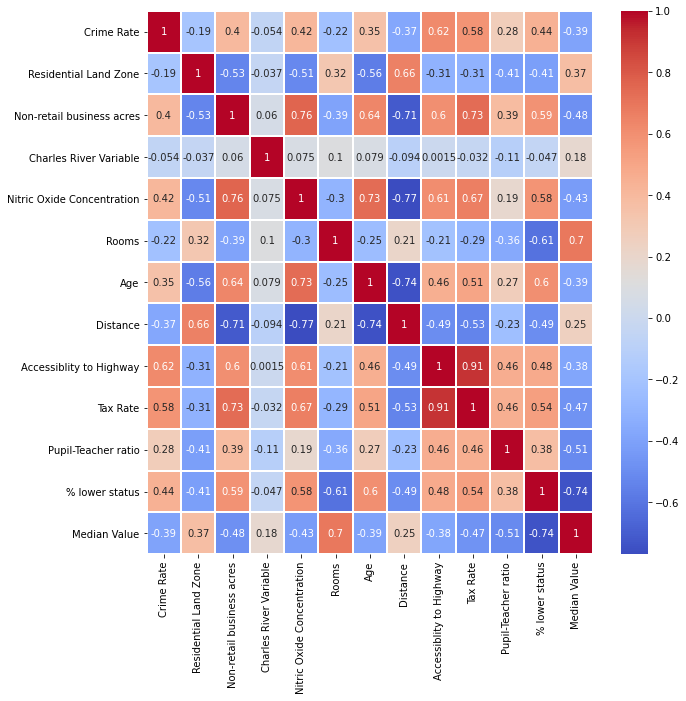

In [11]:
# Now, let's check for a correlation between the target value, which is our Median House price values, and all the other columns.
# Let's check then for a correlation to our median value (which of the variables are highly correlated to it?)
# We use seaborn heatmap. We should also consider the effects of outliers as well. But, let's check for correlation first
# Using seaborn
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(),annot = True,cmap= 'coolwarm', linewidths=1, linecolor='white',fmt='.2g')

Looking at the last column, we found out that the # of rooms (0.7) and % lower status (-0.74) have a strong correlation to the median house value. This means they directly influence the price. The correlation analysis shows that median house value is highly correlated to % lower status and the number of rooms per dwelling.
The total number of Rooms is positively correlated to Median Value. So as number of Rooms increases, the Median value increases. The opposite is true for % lower status: when % lower status goes up, the price goes down.

In [12]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 504
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Crime Rate                  394 non-null    float64
 1   Residential Land Zone       394 non-null    float64
 2   Non-retail business acres   394 non-null    float64
 3   Charles River Variable      394 non-null    float64
 4   Nitric Oxide Concentration  394 non-null    float64
 5   Rooms                       394 non-null    float64
 6   Age                         394 non-null    float64
 7   Distance                    394 non-null    float64
 8   Accessiblity to Highway     394 non-null    int64  
 9   Tax Rate                    394 non-null    int64  
 10  Pupil-Teacher ratio         394 non-null    float64
 11  % lower status              394 non-null    float64
 12  Median Value                394 non-null    float64
dtypes: float64(11), int64(2)
memory usa

In [13]:
data.dropna(subset=['Nitric Oxide Concentration', 'Rooms'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 504
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Crime Rate                  394 non-null    float64
 1   Residential Land Zone       394 non-null    float64
 2   Non-retail business acres   394 non-null    float64
 3   Charles River Variable      394 non-null    float64
 4   Nitric Oxide Concentration  394 non-null    float64
 5   Rooms                       394 non-null    float64
 6   Age                         394 non-null    float64
 7   Distance                    394 non-null    float64
 8   Accessiblity to Highway     394 non-null    int64  
 9   Tax Rate                    394 non-null    int64  
 10  Pupil-Teacher ratio         394 non-null    float64
 11  % lower status              394 non-null    float64
 12  Median Value                394 non-null    float64
dtypes: float64(11), int64(2)
memory usa

In [14]:
#data = data.fillna(0)
#data.info()

In [15]:
# Assign the data to X and y
X = data[['Crime Rate','Residential Land Zone','Non-retail business acres','Charles River Variable','Nitric Oxide Concentration',
             'Rooms','Age','Distance','Accessiblity to Highway','Tax Rate','Pupil-Teacher ratio','% lower status']]
y = data['Median Value'].values.reshape(-1,1)
print(X.shape, y.shape)

(394, 12) (394, 1)


In [16]:
# Use train_test_split to create training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=150)

In [17]:
# Create the model using LinearRegression
model = LinearRegression()

In [18]:
# Fit the model to the training data and calculate the scores for the training and testing data
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.7391878741406435
Testing Score: 0.8161383506184389


Text(0.5, 1.0, 'Residual Plot')

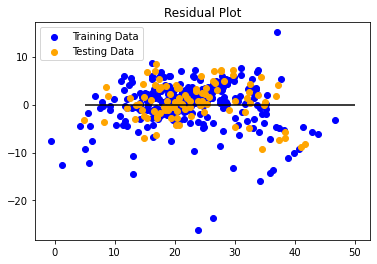

In [19]:
# Plot the Residuals for the Training and Testing data
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

Seloms Code Here

Stephs Code Here

Rachels Code Here

In [20]:
data.head()
data['Home Value'] = (data['Median Value'] * 1000)
data.head()

,Crime Rate,Residential Land Zone,Non-retail business acres,Charles River Variable,Nitric Oxide Concentration,Rooms,Age,Distance,Accessiblity to Highway,Tax Rate,Pupil-Teacher ratio,% lower status,Median Value,Home Value
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,24000.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,21600.0
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,34700.0
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,33400.0
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,5.21,28.7,28700.0


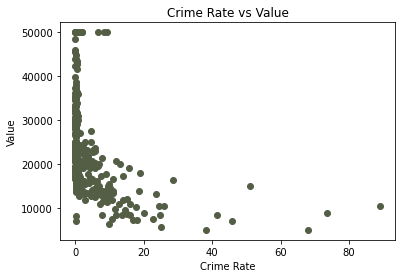

In [21]:
# Generate a scatter plot of Charles River Variable(distance from the river) vs. value
crimeRate = data.iloc[:,0]
value = data.iloc[:,13]

plt.scatter(crimeRate, value, color = '#545E45')

#label
plt.title('Crime Rate vs Value')
plt.xlabel('Crime Rate')
plt.ylabel('Value')
plt.show()

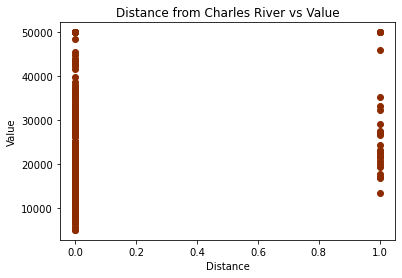

In [22]:
# Generate a scatter plot of Charles River Variable(distance from the river) vs. value
charlesRiver = data.iloc[:,3]
value = data.iloc[:,13]

plt.scatter(charlesRiver, value, color = '#8D2B00')

#label
plt.title('Distance from Charles River vs Value')
plt.xlabel('Distance')
plt.ylabel('Value')
plt.show()

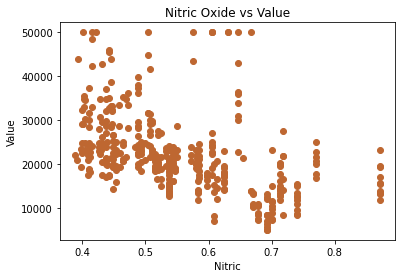

In [29]:
# Generate a scatter plot of Nitric Oxide Concentration vs. value
nitricOxide = data.iloc[:,4]
value = data.iloc[:,13]

plt.scatter(nitricOxide, value, color = '#BE6731')

#label
plt.title('Nitric Oxide vs Value')
plt.xlabel('Nitric')
plt.ylabel('Value')
plt.savefig("output/NitricOxideVsValue.png")
plt.show()

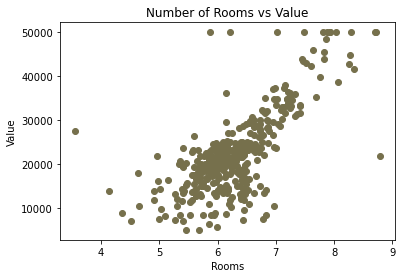

In [27]:
# Generate a scatter plot of rooms vs. value
rooms = data.iloc[:,5]
value = data.iloc[:,13]

plt.scatter(rooms, value, color = '#76704C')


#label
plt.title('Number of Rooms vs Value')
plt.xlabel('Rooms')
plt.ylabel('Value')
plt.savefig("output/NumberOfRoomsVsValue.png")
plt.show()

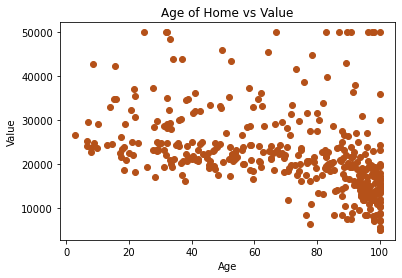

In [30]:
# Generate a scatter plot of age vs. value
age = data.iloc[:,6]
value = data.iloc[:,13]

plt.scatter(age, value, color = '#B55119')

#label
plt.title('Age of Home vs Value')
plt.xlabel('Age')
plt.ylabel('Value')
plt.savefig("output/AgeVsValue.png")
plt.show()

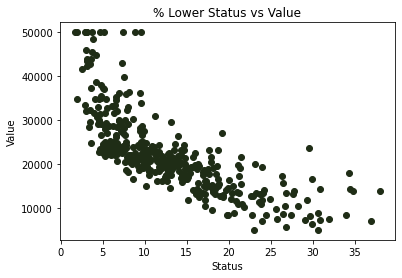

In [26]:
# Generate a scatter plot of % lower status vs. value
lowerStatus = data.iloc[:,11]
value = data.iloc[:,13]

plt.scatter(lowerStatus, value, color = '#1F2D16')

#label
plt.title('% Lower Status vs Value')
plt.xlabel('Status')
plt.ylabel('Value')
plt.savefig("output/StatusVsValue.png")
plt.show()

Matts Code Here